# COMP3850 - FX analysis

In [3]:
#data manipulation libraries
import pandas as pd
import numpy as np
from numpy import histogram 

#data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import boxplot, scatter
# import matplotlib as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import autocorrelation_plot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib import pyplot

#stat models libraries 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller #for augmented Dickey-Fuller test
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt #autocovariance plot

#sklearn predictive modelling
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#technical analysis libaries
import talib as ta # Used to perform Technical analysis of financial market data

#others libraries 
import math
# import datetime
from datetime import datetime

#libaries to collect path for data extraction
import os
import glob

## Quick extraction: Data Extraction and Preparation

This is a quick method so we could easy grab the data due to the original method taking long to process. This method was developed through the origin process where we then create our hourly data into CSVs so we can read into the notebook. This is saves time.

In [5]:
directory = os.getcwd()
filepath = f"{directory}\Hourly_data"
dfaudusd_hr = pd.read_csv(f"{filepath}\dfaudusd_hr.csv")
dfeuraud_hr = pd.read_csv(f"{filepath}\dfeuraud_hr.csv")
dfeurgbp_hr = pd.read_csv(f"{filepath}\dfeurgbp_hr.csv")
dfeurusd_hr = pd.read_csv(f"{filepath}\dfeurusd_hr.csv")
dfgbpusd_hr = pd.read_csv(f"{filepath}\dfgbpusd_hr.csv")
dfaudusd_hr.head()

,Unnamed: 0,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,3600,2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1,-1.0,-1,0.66902,0.66902,0.66883,0.66883,-1,-1.0,-1
2,7200,2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1,-1.0,-1,0.67255,0.67255,0.67253,0.67255,-1,-1.0,-1
3,10800,2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1,-1.0,-1,0.67357,0.67358,0.67356,0.67357,-1,-1.0,-1
4,14400,2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1,-1.0,-1,0.67195,0.67200,0.67195,0.67200,-1,-1.0,-1


In [4]:
dfaudusd_hr = dfaudusd_hr.drop(dfaudusd_hr.columns[[0]], axis=1)
dfeuraud_hr = dfeuraud_hr.drop(dfeuraud_hr.columns[[0]], axis=1)
dfeurgbp_hr = dfeurgbp_hr.drop(dfeurgbp_hr.columns[[0]], axis=1)
dfeurusd_hr = dfeurusd_hr.drop(dfeurusd_hr.columns[[0]], axis=1)
dfgbpusd_hr = dfgbpusd_hr.drop(dfgbpusd_hr.columns[[0]], axis=1)
dfaudusd_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1,-1.0,-1,0.66902,0.66902,0.66883,0.66883,-1,-1.0,-1
2,2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1,-1.0,-1,0.67255,0.67255,0.67253,0.67255,-1,-1.0,-1
3,2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1,-1.0,-1,0.67357,0.67358,0.67356,0.67357,-1,-1.0,-1
4,2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1,-1.0,-1,0.67195,0.67200,0.67195,0.67200,-1,-1.0,-1


In [5]:
dfs= [dfaudusd_hr, dfeuraud_hr, dfeurgbp_hr, dfeurusd_hr, dfgbpusd_hr]
for i in range(len(dfs)):
    dfs[i][['Date', 'Time']] = dfs[i]['datetime'].str.split(' ', expand=True)
    dfs[i][['Time', 'Useless']]  = dfs[i]['Time'].str.split('+', expand=True)
dfaudusd_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1,-1.0,-1,0.66902,0.66902,0.66883,0.66883,-1,-1.0,-1,2020-06-01,01:00:00,00:00
2,2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1,-1.0,-1,0.67255,0.67255,0.67253,0.67255,-1,-1.0,-1,2020-06-01,02:00:00,00:00
3,2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1,-1.0,-1,0.67357,0.67358,0.67356,0.67357,-1,-1.0,-1,2020-06-01,03:00:00,00:00
4,2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1,-1.0,-1,0.67195,0.67200,0.67195,0.67200,-1,-1.0,-1,2020-06-01,04:00:00,00:00


## Data Extraction

Extracting the given FX csv files and storing them within dataframes via Jupiter notebook

In [7]:
def data_extraction(curr):
    directory = os.getcwd()
    filepath = f"{directory}\FX"
    file_list = []
    for file in os.listdir(filepath):
        d = os.path.join(filepath, file)
        if os.path.isdir(d):
            file_list.append(d)
    dfs = []
    for d in file_list:
        csv_files = glob.glob(os.path.join(d, "*.csv"))
        for f in csv_files:
            if f"bar_Forex_{curr}" in f:
                df = pd.read_csv(f)
                dfs.append(df)
    final_df = pd.concat(dfs)
    return final_df

In [8]:
dfaudusd = data_extraction('AUDUSD')
dfeuraud = data_extraction('EURAUD')
dfeurgbp = data_extraction('EURGBP')
dfeurusd = data_extraction('EURUSD')
dfgbpusd = data_extraction('GBPUSD')

In [9]:
dfaudusd.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1


## Data Preparation

This section will consist of checking the data sizes, data types, updating data types, extracting data into hourly intervals.

In [12]:
#Determining the size of each dataframe (number of records, number of columns)
print(dfaudusd.shape, dfeuraud.shape, dfeurgbp.shape, dfeurusd.shape, dfgbpusd.shape)

(9187200, 15) (9187200, 15) (9187200, 15) (9187200, 15) (9187200, 15)


In [14]:
#display the datatypes of each column
dfaudusd.info()
# dfeuraud.info()
# dfeurgbp.info()
# dfeurusd.info()
# dfgbpusd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9187200 entries, 0 to 75599
Data columns (total 18 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   bid_open      float64
 2   bid_high      float64
 3   bid_low       float64
 4   bid_close     float64
 5   bid_volume    int64  
 6   bid_average   float64
 7   bid_barCount  int64  
 8   ask_open      float64
 9   ask_high      float64
 10  ask_low       float64
 11  ask_close     float64
 12  ask_volume    int64  
 13  ask_average   float64
 14  ask_barCount  int64  
 15  Date          object 
 16  Time          object 
 17  Useless       object 
dtypes: float64(10), int64(4), object(4)
memory usage: 1.3+ GB


In [14]:
#display descriptive statistics on AUD-USD pairings
dfaudusd.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0
mean,0.710,0.710,0.710,0.710,-1.0,-1.0,-1.0,0.710,0.710,0.710,0.710,-1.0,-1.0,-1.0
std,0.014,0.014,0.014,0.014,0.0,0.0,0.0,0.014,0.014,0.014,0.014,0.0,0.0,0.0
min,0.666,0.666,0.666,0.666,-1.0,-1.0,-1.0,0.666,0.666,0.666,0.666,-1.0,-1.0,-1.0
25%,0.697,0.697,0.697,0.697,-1.0,-1.0,-1.0,0.697,0.697,0.697,0.697,-1.0,-1.0,-1.0
50%,0.713,0.713,0.713,0.713,-1.0,-1.0,-1.0,0.713,0.713,0.713,0.713,-1.0,-1.0,-1.0
75%,0.719,0.719,0.719,0.719,-1.0,-1.0,-1.0,0.719,0.719,0.719,0.719,-1.0,-1.0,-1.0
max,0.741,0.741,0.741,0.741,-1.0,-1.0,-1.0,0.741,0.741,0.741,0.741,-1.0,-1.0,-1.0


In [15]:
dfeuraud.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0
mean,1.638,1.638,1.638,1.638,-1.0,-1.0,-1.0,1.638,1.638,1.638,1.638,-1.0,-1.0,-1.0
std,0.013,0.013,0.013,0.013,0.0,0.0,0.0,0.013,0.013,0.013,0.013,0.0,0.0,0.0
min,1.603,1.603,1.603,1.603,-1.0,-1.0,-1.0,1.603,1.603,1.603,1.603,-1.0,-1.0,-1.0
25%,1.627,1.627,1.627,1.627,-1.0,-1.0,-1.0,1.627,1.627,1.627,1.627,-1.0,-1.0,-1.0
50%,1.636,1.637,1.636,1.636,-1.0,-1.0,-1.0,1.637,1.637,1.637,1.637,-1.0,-1.0,-1.0
75%,1.647,1.647,1.647,1.647,-1.0,-1.0,-1.0,1.648,1.648,1.648,1.648,-1.0,-1.0,-1.0
max,1.683,1.683,1.683,1.683,-1.0,-1.0,-1.0,1.683,1.683,1.683,1.683,-1.0,-1.0,-1.0


In [16]:
#checking for nulls and the sum
print(f'Are there any null values in AUDUSD? {dfaudusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfaudusd.isnull().sum()}')
print(f'Are there any null values in EUROAUD? {dfeuraud.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeuraud.isnull().sum()}')
print(f'Are there any null values in EUROGBP? {dfeurgbp.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeurgbp.isnull().sum()}')
print(f'Are there any null values EURUSD? {dfeurusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeurusd.isnull().sum()}')
print(f'Are there any null values GBPUSD? {dfgbpusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfgbpusd.isnull().sum()}')

Are there any null values in AUDUSD? False
Are there any null values in EUROAUD? False
Are there any null values in EUROGBP? False
Are there any null values EURUSD? False
Are there any null values GBPUSD? False


### Extracting data into hourly intervals into seconds

The datasets are fairly large due to them being in intervals of seconds so we decided to make processing our analysis faster to only grab every hour of the dataset eg 1:00, 2:00, 3:00...

In [15]:
dfs= [dfaudusd, dfeuraud, dfeurgbp, dfeurusd, dfgbpusd]
for i in range(len(dfs)):
    dfs[i][['Date', 'Time']] = dfs[i]['date'].str.split(' ', expand=True)
    dfs[i][['Time', 'Useless']]  = dfs[i]['Time'].str.split('+', expand=True)
dfaudusd.head()



,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1,2020-06-01,00:00:01,00:00
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:02,00:00
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1,2020-06-01,00:00:03,00:00
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1,2020-06-01,00:00:04,00:00


In [16]:
#changing the name from date to datetime which is a better field name
for i in range(len(dfs)):
    dfs[i].rename(columns = {'date' : 'datetime'}, inplace=True)

In [17]:
#check updated datatypes
dfaudusd.dtypes
#dfeuraud.dtypes
#dfeurgbp.dtypes
#dfeurusd.dtypes
#dfgbpusd.dtypes

datetime         object
bid_open        float64
bid_high        float64
bid_low         float64
bid_close       float64
bid_volume        int64
bid_average     float64
bid_barCount      int64
ask_open        float64
ask_high        float64
ask_low         float64
ask_close       float64
ask_volume        int64
ask_average     float64
ask_barCount      int64
Date             object
Time             object
Useless          object
dtype: object

### Conducting EDA

Line Graphs - Trying the identify trends and shapes

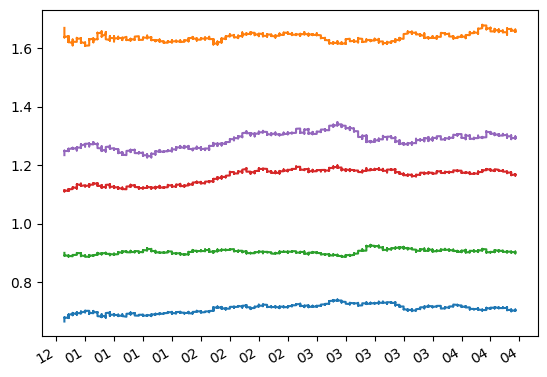

In [6]:
from matplotlib.dates import DateFormatter


fig, ax = plt.subplots()
line1 =ax.plot(dfaudusd_hr['Date'], dfaudusd_hr['bid_close'], label = 'AUD/USD')
line2 =ax.plot(dfeuraud_hr['Date'], dfeuraud_hr['bid_close'], label = 'EUR/AUD')
line3 =ax.plot(dfeurgbp_hr['Date'], dfeurgbp_hr['bid_close'], label = 'EUR/GBP')
line4 =ax.plot(dfeurusd_hr['Date'], dfeurusd_hr['bid_close'], label = 'EUR/USD')
line5 =ax.plot(dfgbpusd_hr['Date'], dfgbpusd_hr['bid_close'], label = 'GBP/USD')
fig.autofmt_xdate()
#ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#ax.legend([line1, line2, line3, line4, line5])
#ax.set_title('Bid Open for AU/USD')

Broken down by Currency Pair

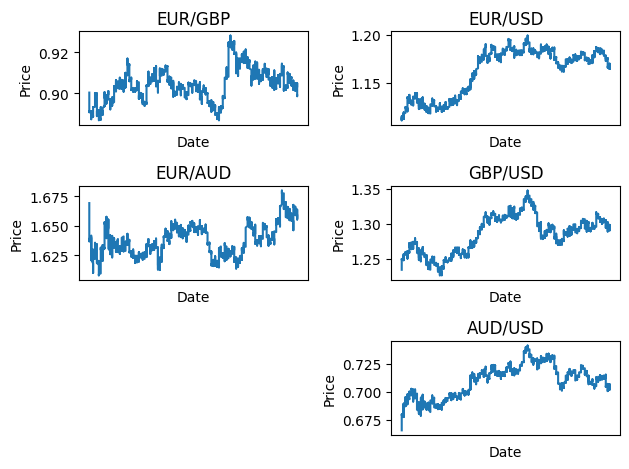

In [7]:
# Placing the plots in the plane
plot1 = plt.subplot2grid((3, 2), (0, 0), colspan=1)
plot2 = plt.subplot2grid((3, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 2), (0, 1), rowspan=1)
plot4 = plt.subplot2grid((3, 2), (1, 1), rowspan=1)
plot5 = plt.subplot2grid((3, 2), (2, 1), rowspan=1)

# Plot for EUR/AUD
plot2.plot(dfeuraud_hr['Date'], dfeuraud_hr['bid_close'])
plot2.set_xticks([])
plot2.set_xlabel('Date')
plot2.set_ylabel('Price')
plot2.set_title('EUR/AUD')

# Plot for EUR/GBP
plot1.plot(dfeurgbp_hr['Date'], dfeurgbp_hr['bid_close'])
plot1.set_xticks([])
plot1.set_xlabel('Date')
plot1.set_ylabel('Price')
plot1.set_title('EUR/GBP')

# Plot for EUR/USD
plot3.plot(dfeurusd_hr['Date'], dfeurusd_hr['bid_close'])
plot3.set_xticks([])
plot3.set_xlabel('Date')
plot3.set_ylabel('Price')
plot3.set_title('EUR/USD')

# Plot for GBP/USD
plot4.plot(dfgbpusd_hr['Date'], dfgbpusd_hr['bid_close'])
plot4.set_xticks([])
plot4.set_xlabel('Date')
plot4.set_ylabel('Price')
plot4.set_title('GBP/USD')

# Plot for AUD/USD
plot5.plot(dfaudusd_hr['Date'], dfaudusd_hr['bid_close'])
plot5.set_xticks([])
plot5.set_xlabel('Date')
plot5.set_ylabel('Price')
plot5.set_title('AUD/USD')

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

Candlestick Plots - To apply any technical analysis

In [28]:
##### CANDLESTICK CODE #####
fig = go.Figure(data=[go.Candlestick(x=dfaudusd_hr['Date'],
                open=dfaudusd_hr['bid_open'],
                high=dfaudusd_hr['bid_high'],
                low=dfaudusd_hr['bid_low'],
                close=dfaudusd_hr['bid_close'])])

fig.show()
##### Candlestick code #####

In [35]:
fig = go.Figure(data=[go.Candlestick(x=dfeuraud_hr['Date'],
                open=dfeuraud_hr['bid_open'],
                high=dfeuraud_hr['bid_high'],
                low=dfeuraud_hr['bid_low'],
                close=dfeuraud_hr['bid_close'])])

fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=dfeurgbp_hr['Date'],
                open=dfeurgbp_hr['bid_open'],
                high=dfeurgbp_hr['bid_high'],
                low=dfeurgbp_hr['bid_low'],
                close=dfeurgbp_hr['bid_close'])])

fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=dfeurusd_hr['Date'],
                open=dfeurusd_hr['bid_open'],
                high=dfeurusd_hr['bid_high'],
                low=dfeurusd_hr['bid_low'],
                close=dfeurusd_hr['bid_close'])])

fig.show()

In [39]:
fig = go.Figure(data=[go.Candlestick(x=dfgbpusd_hr['Date'],
                open=dfgbpusd_hr['bid_open'],
                high=dfgbpusd_hr['bid_high'],
                low=dfgbpusd_hr['bid_low'],
                close=dfgbpusd_hr['bid_close'])])

fig.show()

Boxplots

<AxesSubplot: title={'center': 'GBP/USD'}>

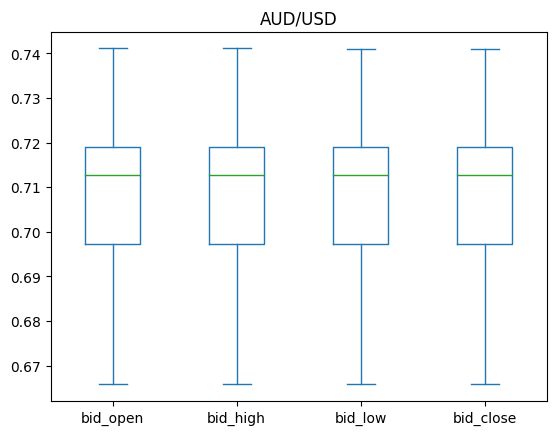

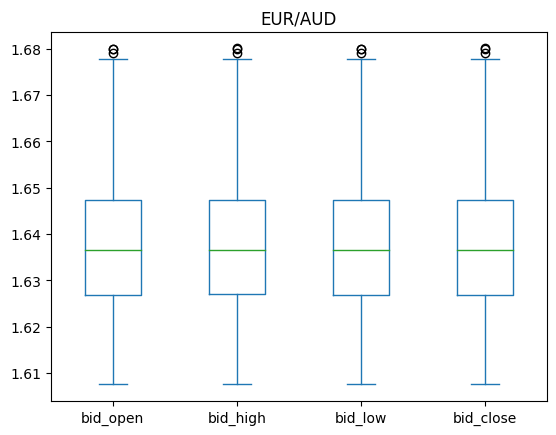

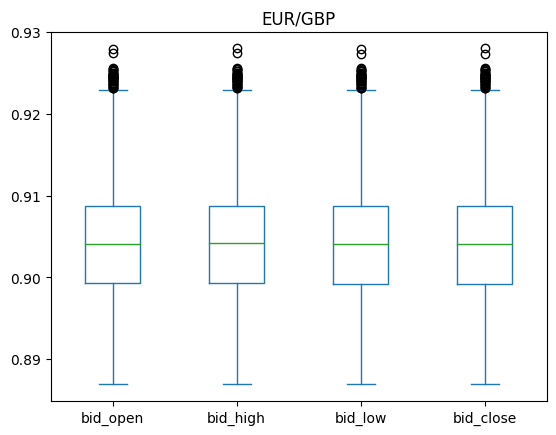

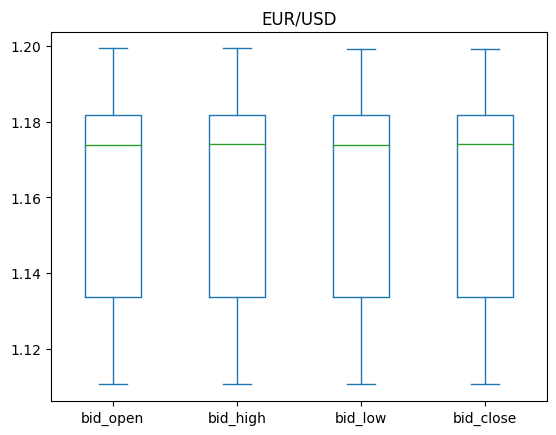

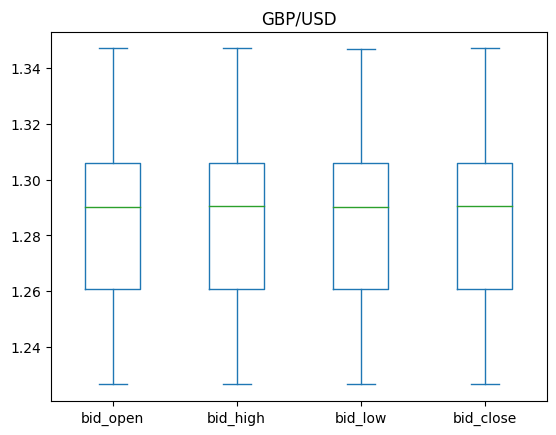

In [9]:
dfaudusd_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'AUD/USD')
dfeuraud_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'EUR/AUD')
dfeurgbp_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'EUR/GBP')
dfeurusd_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'EUR/USD')
dfgbpusd_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'GBP/USD')

Bollinger Bands - Estimating the buy and sell

In [81]:
##Bollinger Bands EUR-AUD
dfeuraud_hr['TP'] = (dfeuraud_hr['bid_close'] + dfeuraud_hr['bid_low'] + dfeuraud_hr['bid_high'])/3
dfeuraud_hr['std'] = dfeuraud_hr['TP'].rolling(20).std(ddof=0)
dfeuraud_hr['MA-TP'] = dfeuraud_hr['TP'].rolling(20).mean()
dfeuraud_hr['BOLU'] = dfeuraud_hr['MA-TP'] + 2*dfeuraud_hr['std']
dfeuraud_hr['BOLD'] = dfeuraud_hr['MA-TP'] - 2*dfeuraud_hr['std']
dfeuraud_hr = dfeuraud_hr.dropna()
print(dfeuraud_hr.head())


                     datetime  bid_open  bid_high  bid_low  bid_close  \
19  2020-06-01 19:00:00+00:00   1.63720   1.63720  1.63719    1.63720   
20  2020-06-01 20:00:00+00:00   1.63765   1.63785  1.63761    1.63785   
21  2020-06-01 22:00:00+00:00   1.63667   1.63679  1.63667    1.63669   
22  2020-06-01 23:00:00+00:00   1.63881   1.63895  1.63881    1.63891   
23  2020-06-02 00:00:00+00:00   1.63992   1.63993  1.63967    1.63978   

    bid_volume  bid_average  bid_barCount  ask_open  ask_high  ...  \
19          -1         -1.0            -1   1.63726   1.63730  ...   
20          -1         -1.0            -1   1.63773   1.63790  ...   
21          -1         -1.0            -1   1.63706   1.63713  ...   
22          -1         -1.0            -1   1.63892   1.63907  ...   
23          -1         -1.0            -1   1.63998   1.63998  ...   

    ask_average  ask_barCount        Date      Time  Useless        TP  \
19         -1.0            -1  2020-06-01  19:00:00    00:00  1.63

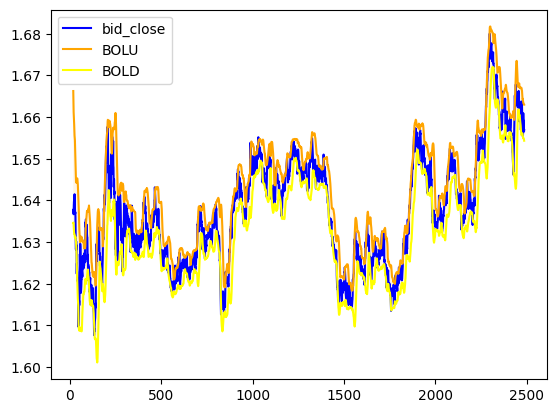

In [82]:
# Plotting it all together
ax = dfeuraud_hr[['bid_close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(dfeuraud_hr.index, dfeuraud_hr['BOLD'], dfeuraud_hr['BOLU'], facecolor='orange', alpha=0.1)
plt.show()

In [83]:
##Bollinger Bands EUR-GBP
dfeurgbp_hr['TP'] = (dfeurgbp_hr['bid_close'] + dfeurgbp_hr['bid_low'] + dfeurgbp_hr['bid_high'])/3
dfeurgbp_hr['std'] = dfeurgbp_hr['TP'].rolling(20).std(ddof=0)
dfeurgbp_hr['MA-TP'] = dfeurgbp_hr['TP'].rolling(20).mean()
dfeurgbp_hr['BOLU'] = dfeurgbp_hr['MA-TP'] + 2*dfeurgbp_hr['std']
dfeurgbp_hr['BOLD'] = dfeurgbp_hr['MA-TP'] - 2*dfeurgbp_hr['std']
dfeurgbp_hr = dfeurgbp_hr.dropna()
print(dfeurgbp_hr.head())


                     datetime  bid_open  bid_high  bid_low  bid_close  \
57  2020-06-03 11:00:00+00:00   0.89049   0.89049  0.89039    0.89039   
58  2020-06-03 12:00:00+00:00   0.89104   0.89106  0.89104    0.89106   
59  2020-06-03 13:00:00+00:00   0.89039   0.89039  0.89038    0.89039   
60  2020-06-03 14:00:00+00:00   0.89197   0.89203  0.89195    0.89200   
61  2020-06-03 15:00:00+00:00   0.89042   0.89043  0.89036    0.89039   

    bid_volume  bid_average  bid_barCount  ask_open  ask_high  ...  \
57          -1         -1.0            -1   0.89050   0.89050  ...   
58          -1         -1.0            -1   0.89105   0.89109  ...   
59          -1         -1.0            -1   0.89042   0.89042  ...   
60          -1         -1.0            -1   0.89213   0.89214  ...   
61          -1         -1.0            -1   0.89044   0.89048  ...   

    ask_average  ask_barCount        Date      Time  Useless        TP  \
57         -1.0            -1  2020-06-03  11:00:00    00:00  0.89

C:\Users\Chris\AppData\Local\Temp\ipykernel_3708\3649627040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfeurgbp_hr['TP'] = (dfeurgbp_hr['bid_close'] + dfeurgbp_hr['bid_low'] + dfeurgbp_hr['bid_high'])/3
C:\Users\Chris\AppData\Local\Temp\ipykernel_3708\3649627040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfeurgbp_hr['std'] = dfeurgbp_hr['TP'].rolling(20).std(ddof=0)
C:\Users\Chris\AppData\Local\Temp\ipykernel_3708\3649627040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

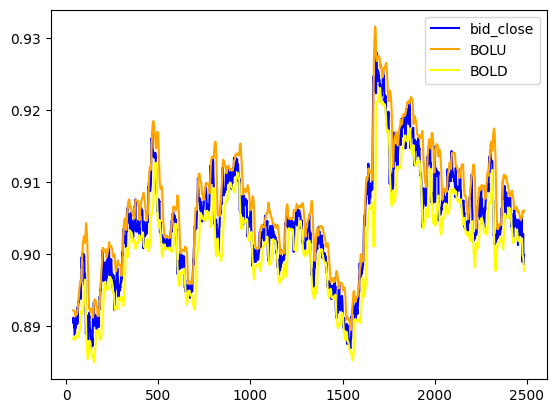

In [80]:
# Plotting it all together
ax = dfeurgbp_hr[['bid_close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(dfeurgbp_hr.index, dfeurgbp_hr['BOLD'], dfeurgbp_hr['BOLU'], facecolor='orange', alpha=0.1)
plt.show()

In [7]:
# df_open = dfaudusdse[['date', 'bid_open']]
# df_open['date'] = pd.to_datetime(df_open['date'])
# df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))
# del df_open['date']
# df_open.head()

## Checking stationarity

### Autocovariance and Autocorrelation plots 

In [27]:
# Plotting Autocovariance
autocovariance_audusd = smt.stattools.acovf(dfaudusd_hr['bid_close'], fft=True)
autocovariance_euraud = smt.stattools.acovf(dfeuraud_hr['bid_close'], fft=True)
autocovariance_eurgbp = smt.stattools.acovf(dfeurgbp_hr['bid_close'], fft=True)
autocovariance_eurusd = smt.stattools.acovf(dfeurusd_hr['bid_close'], fft=True)
autocovariance_gbpusd = smt.stattools.acovf(dfgbpusd_hr['bid_close'], fft=True)


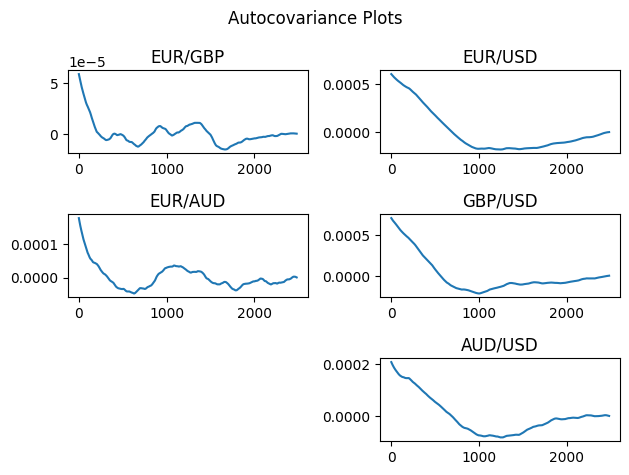

In [28]:
# Placing the plots in the plane
plot1 = plt.subplot2grid((3, 2), (0, 0), colspan=1)
plot2 = plt.subplot2grid((3, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 2), (0, 1), rowspan=1)
plot4 = plt.subplot2grid((3, 2), (1, 1), rowspan=1)
plot5 = plt.subplot2grid((3, 2), (2, 1), rowspan=1)

# Plot for EUR/AUD
plot2.plot(list(range(0,len(autocovariance_euraud))),autocovariance_euraud)
plot2.set_title('EUR/AUD')

# Plot for EUR/GBP
plot1.plot(list(range(0,len(autocovariance_eurgbp))),autocovariance_eurgbp)
plot1.set_title('EUR/GBP')

# Plot for EUR/USD
plot3.plot(list(range(0,len(autocovariance_eurusd))),autocovariance_eurusd)
plot3.set_title('EUR/USD')

# Plot for GBP/USD
plot4.plot(list(range(0,len(autocovariance_gbpusd))),autocovariance_gbpusd)
plot4.set_title('GBP/USD')

# Plot for AUD/USD
plot5.plot(list(range(0,len(autocovariance_audusd))),autocovariance_audusd)
plot5.set_title('AUD/USD')

# Packing all the plots and displaying them
plt.suptitle('Autocovariance Plots')
plt.tight_layout()
plt.show()

Autocovariance is a function that allows for identification of the covariance of the process in between time points. It can be expressed through correlation coefficients between –1 and +1 (y-axis).

Autocovariance plots for the different currency pairs are shown above. These plots are harder to interpret, hence we will instead graph autocorrelation plots to determine stationarity of the time series. 


In [21]:
def autocorrelation_plots(curr_df, name):
    fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2) # create two subplots, one in each row
    smt.graphics.plot_acf(curr_df['bid_close'],lags=10,alpha=0.05, title="Autocorrelation with lags 10", ax=ax)
    smt.graphics.plot_acf(curr_df['bid_close'],lags=50,alpha=0.05, title="Autocorrelation with lags 50",ax=ax2)
    smt.graphics.plot_acf(curr_df['bid_close'],lags=100,alpha=0.05, title="Autocorrelation with lags 100",ax=ax3)
    smt.graphics.plot_acf(curr_df['bid_close'],lags=200,alpha=0.05, title="Autocorrelation with lags 200",ax=ax4)
    fig.suptitle('Autocorrelation ' + str(name))
    fig.tight_layout()
    plt.show()

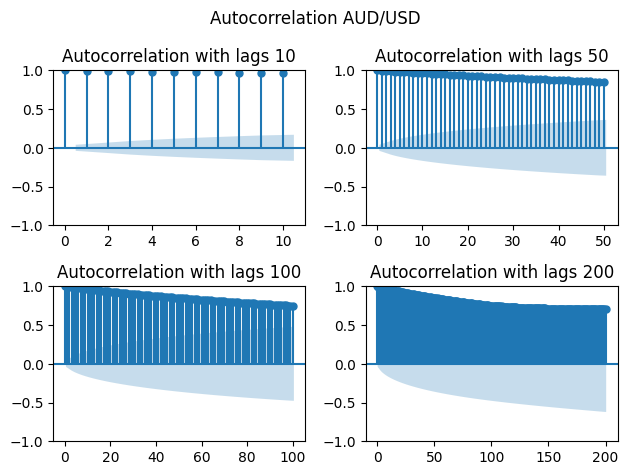

In [22]:
autocorrelation_plots(dfaudusd_hr, 'AUD/USD')

Currency pair AUD/USD is not stationary. In addition, we can see the it is decaying, or decreasing very slowly and remains well above the significant range. This is indicative of a non-stationary series. 

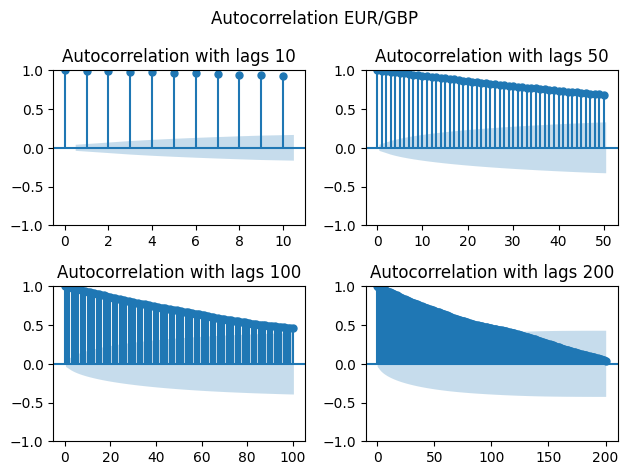

In [23]:
autocorrelation_plots(dfeurgbp_hr, 'EUR/GBP')

We can observe that curreny pair EUR/GBP is stationary with lags over 125. 

For a stationary series, we want to see that the autocorrelation plots show exponential decay, which can be observed above.


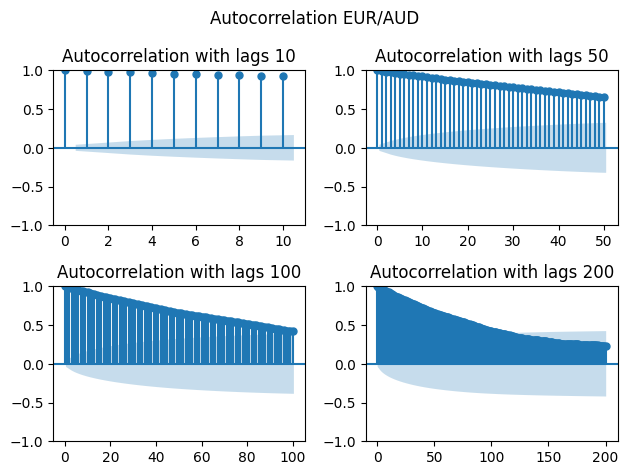

In [24]:
autocorrelation_plots(dfeuraud_hr, 'EUR/AUD')

EUR/AUD has exponential decay, hence is a stationary series.

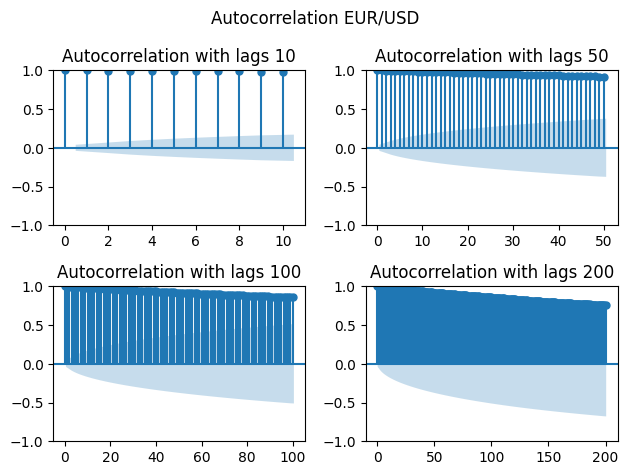

In [25]:
autocorrelation_plots(dfeurusd_hr, 'EUR/USD')

EUR/USD decreases very slowly which suggests non-stationarity.

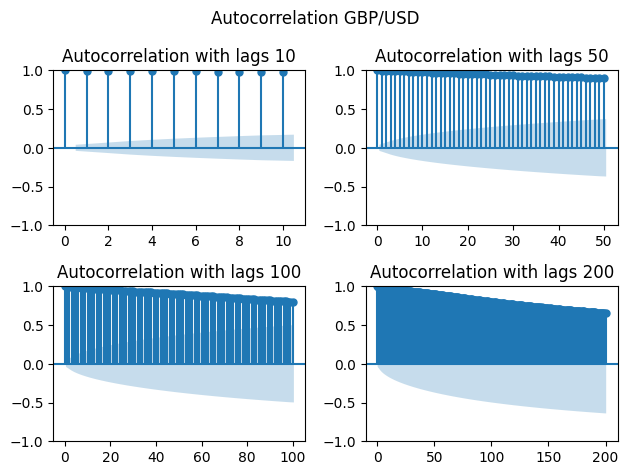

In [26]:
autocorrelation_plots(dfgbpusd_hr, 'GBP/USD')

GBP/USD decreases very slowly which suggests non-stationarity

### Augmented Dickey Fuller test

In [10]:
def adfuller_test(data, field):
    print(f'Hypothesis test on field :{field}')
    print(f'H0: {field} is not stationary, H1: {field} is stationary')
    ADF_stat, p_val, lags, obs, crit, t = adfuller(data[field])
    print(f'ADF Statistic: {ADF_stat}')
    print(f'p-value: {p_val}')
    print(f'lags: {lags}')
    print(f'obs: {obs}')
    print(f'Critical Values: {crit}')
    print(f't: {t}')
    if p_val > 0.05:
        print('Conclusion: Do not reject H0, probably not stationary')
    else:
        print('Conclusion: Reject H0, Is stationary')

In [11]:
print("Dickey-Fuller test on AUD/USD")
adfuller_test(dfaudusd_hr, 'bid_close')

Dickey-Fuller test on AUD/USD
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.8573980568904536
p-value: 0.05053104713100041
lags: 1
obs: 2484
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}
t: -27079.556540167752
Conclusion: Do not reject H0, probably not stationary


In [12]:
print("Dickey-Fuller test on EUR/GBP")
adfuller_test(dfeurgbp_hr, 'bid_close')

Dickey-Fuller test on EUR/GBP
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.919122712434902
p-value: 0.04316904869278075
lags: 1
obs: 2484
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}
t: -27771.237255219763
Conclusion: Reject H0, Is stationary


In [13]:
print("Dickey-Fuller test on EUR/AUD")
adfuller_test(dfeuraud_hr, 'bid_close')

Dickey-Fuller test on EUR/AUD
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.922679327060934
p-value: 0.04277355024636722
lags: 3
obs: 2482
Critical Values: {'1%': -3.4329874198181174, '5%': -2.86270519435214, '10%': -2.56739027870612}
t: -24614.450540478185
Conclusion: Reject H0, Is stationary


In [14]:
print("Dickey-Fuller test on EUR/USD")
adfuller_test(dfeurusd_hr, 'bid_close')

Dickey-Fuller test on EUR/USD
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.042931854929713
p-value: 0.26807182468197
lags: 0
obs: 2485
Critical Values: {'1%': -3.4329842325121738, '5%': -2.862703786843828, '10%': -2.567389529328891}
t: -26617.03196613028
Conclusion: Do not reject H0, probably not stationary


In [15]:
print("Dickey-Fuller test on GBP/USD")
adfuller_test(dfgbpusd_hr, 'bid_close')

Dickey-Fuller test on GBP/USD
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.060419007507181
p-value: 0.26072512988547564
lags: 0
obs: 2485
Critical Values: {'1%': -3.4329842325121738, '5%': -2.862703786843828, '10%': -2.567389529328891}
t: -24835.30088898441
Conclusion: Do not reject H0, probably not stationary


Hence, the Dickey-Fuller tests all support conclusions drawn upon by the Autocorrelation graphs. 

- Currency pairs EUR/GBP and EUR/AUD were found to be stationary series.
- Whereas currency pairs AUD/USD, EUR/USD and GBP/USD were found to be non-stationary series.

## ARIMA model 

Steps for the ARIMA Model:
1) Correct Data Sets
2) Stationarity
3) ACF and PACF
4) Forecasting

Gonna assume the data is fine from previously, so take 1) as done

#### Stationarity

AUD/USD already went through the ADF test and was proven as stationary, let us put the rest of the data through.

In [ ]:
adfuller_test(dfeuraud_hr,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.922679327060934
p-value: 0.04277355024636722
lags: 3
obs: 2482
Critical Values: {'1%': -3.4329874198181174, '5%': -2.86270519435214, '10%': -2.56739027870612}
t: -24614.450540478185
Conclusion: Reject H0, Is stationary


In [ ]:
adfuller_test(dfeurgbp_hr, 'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.919122712434902
p-value: 0.04316904869278075
lags: 1
obs: 2484
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}
t: -27771.237255219763
Conclusion: Reject H0, Is stationary


In [ ]:
adfuller_test(dfeurusd_hr,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.042931854929713
p-value: 0.26807182468197
lags: 0
obs: 2485
Critical Values: {'1%': -3.4329842325121738, '5%': -2.862703786843828, '10%': -2.567389529328891}
t: -26617.03196613028
Conclusion: Do not reject H0, probably not stationary


In [ ]:
adfuller_test(dfgbpusd_hr,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.060419007507181
p-value: 0.26072512988547564
lags: 0
obs: 2485
Critical Values: {'1%': -3.4329842325121738, '5%': -2.862703786843828, '10%': -2.567389529328891}
t: -24835.30088898441
Conclusion: Do not reject H0, probably not stationary


So from the stationarity check, we have aud/usd, eur/aud as stationary datasets, and eur/gbp, gbp/usd as non stationary datasets. We need to work with the non-stationary datasets to convert them to stationary.

In [30]:
dfeurgbp_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.90035,0.90037,0.90033,0.90036,-1,-1.0,-1,0.90044,0.90044,0.90040,0.90042,-1,-1.0,-1,2020-06-01,00:00:00,00:00
3600,2020-06-01 01:00:00+00:00,0.89869,0.89869,0.89862,0.89862,-1,-1.0,-1,0.89873,0.89873,0.89867,0.89867,-1,-1.0,-1,2020-06-01,01:00:00,00:00
7200,2020-06-01 02:00:00+00:00,0.89715,0.89719,0.89715,0.89718,-1,-1.0,-1,0.89718,0.89722,0.89718,0.89722,-1,-1.0,-1,2020-06-01,02:00:00,00:00
10800,2020-06-01 03:00:00+00:00,0.89786,0.89786,0.89785,0.89785,-1,-1.0,-1,0.89791,0.89792,0.89788,0.89790,-1,-1.0,-1,2020-06-01,03:00:00,00:00
14400,2020-06-01 04:00:00+00:00,0.89880,0.89885,0.89878,0.89881,-1,-1.0,-1,0.89884,0.89886,0.89882,0.89883,-1,-1.0,-1,2020-06-01,04:00:00,00:00


In [31]:
dfeurgbp_hr['bid_close'].head()

0        0.90035
3600     0.89869
7200     0.89715
10800    0.89786
14400    0.89880
Name: bid_open, dtype: float64

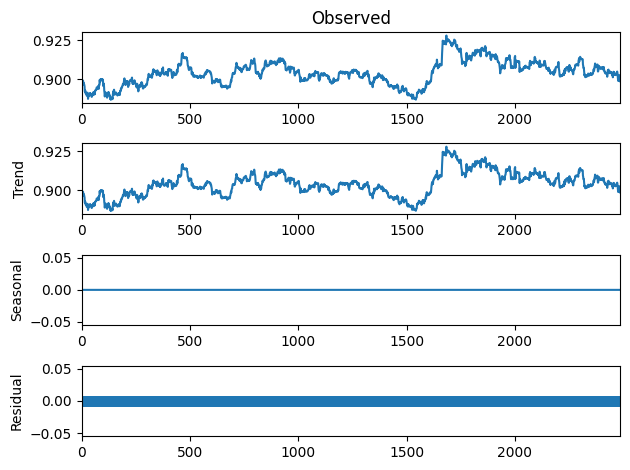

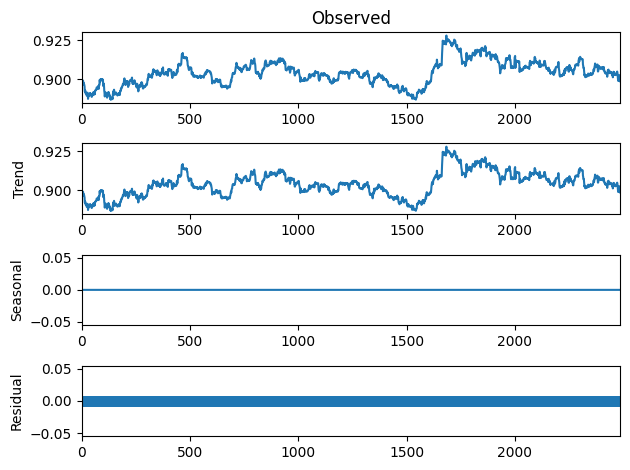

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

eurgbp_list = dfeurgbp_hr['bid_close'].tolist()
observations = seasonal_decompose(eurgbp_list, model = 'additive', period = 1)
observations.plot()



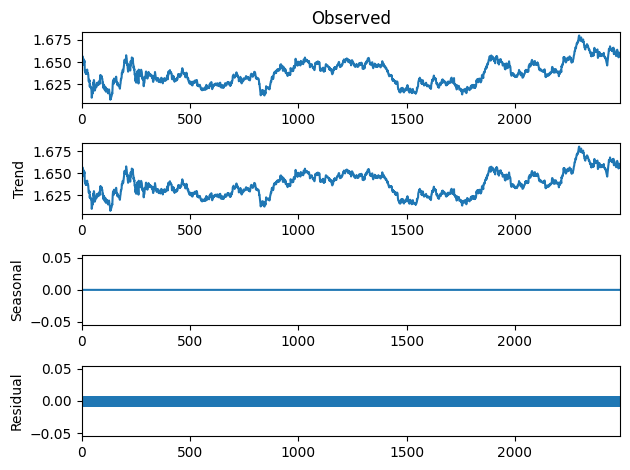

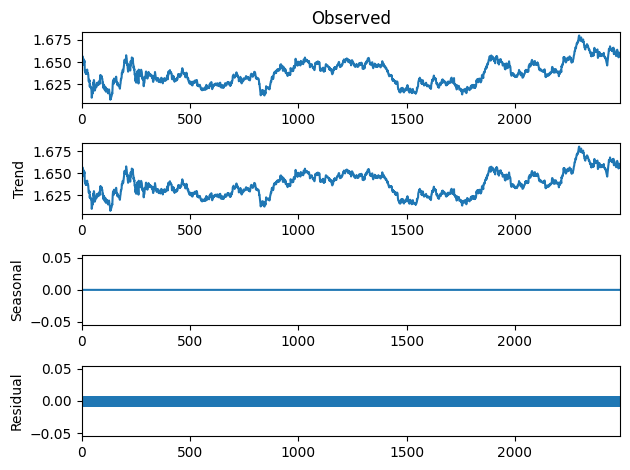

In [33]:
euraud_list = dfeuraud_hr['bid_close'].tolist()
observations = seasonal_decompose(euraud_list, model = 'additive', period = 1)
observations.plot()

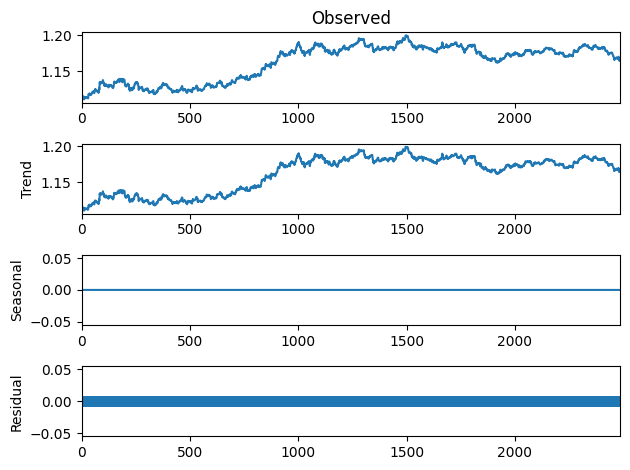

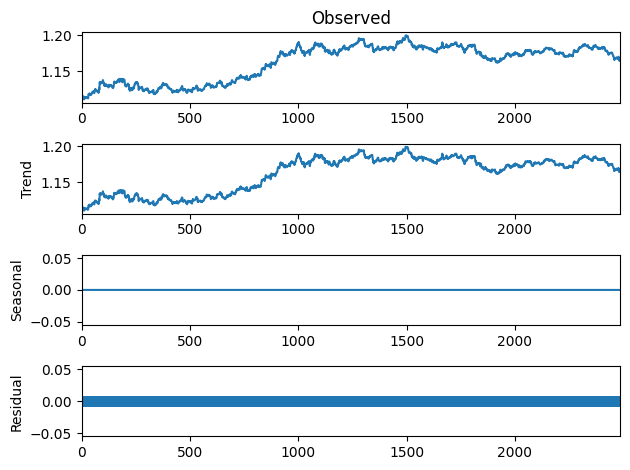

In [35]:
eurusd_list = dfeurusd_hr['bid_close'].tolist()
observations = seasonal_decompose(eurusd_list, model = 'additive', period = 1)
observations.plot()

Graphically, we can see that the two time series have some form of trend. We are going to take the difference between the data points once, and then see if the series become stationary. Can insert equations here later.

In [42]:
dfeurusd_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,1.11157,1.11158,1.11154,1.11154,-1,-1.0,-1,1.11158,1.11160,1.11155,1.11155,-1,-1.0,-1,2020-06-01,00:00:00,00:00
3600,2020-06-01 01:00:00+00:00,1.11217,1.11217,1.11204,1.11206,-1,-1.0,-1,1.11219,1.11219,1.11206,1.11207,-1,-1.0,-1,2020-06-01,01:00:00,00:00
7200,2020-06-01 02:00:00+00:00,1.11341,1.11345,1.11341,1.11345,-1,-1.0,-1,1.11342,1.11347,1.11342,1.11346,-1,-1.0,-1,2020-06-01,02:00:00,00:00
10800,2020-06-01 03:00:00+00:00,1.11374,1.11374,1.11371,1.11371,-1,-1.0,-1,1.11376,1.11376,1.11373,1.11373,-1,-1.0,-1,2020-06-01,03:00:00,00:00
14400,2020-06-01 04:00:00+00:00,1.11329,1.11330,1.11329,1.11330,-1,-1.0,-1,1.11330,1.11331,1.11330,1.11331,-1,-1.0,-1,2020-06-01,04:00:00,00:00


In [54]:
#differencing with the shift function

dfeurusd_diff1 = dfeurusd_hr['bid_close'] - dfeurusd_hr['bid_close'].shift(1)
dfeurusd_diff1 = dfeurusd_diff1.to_frame(name = 'bid_close') #converting series to dataframe with correct column name 
dfeurusd_diff1.head()

0            NaN
3600     0.00052
7200     0.00139
10800    0.00026
14400   -0.00041
Name: bid_close, dtype: float64

In [60]:
type(dfeurusd_diff1)
dfeurusd_diff1.head()

,bid_close
0,NaN
3600,0.00052
7200,0.00139
10800,0.00026
14400,-0.00041


In [68]:
dfeurusd_diff1.dropna()
dfeurusd_diff1
list(dfeurusd_diff1)
dfeurusd_diff1.head(1)
dfeurusd_diff1.isnull()

,bid_close
0,True
3600,False
7200,False
10800,False
14400,False
...,...
57600,False
61200,False
64800,False
68400,False


In [69]:
dfeurusd_diff1.dropna(inplace = True)
dfeurusd_diff1

,bid_close
3600,0.00052
7200,0.00139
10800,0.00026
14400,-0.00041
18000,0.00005
...,...
57600,-0.00304
61200,0.00033
64800,-0.00052
68400,-0.00015


In [70]:
adfuller_test(dfeurusd_diff1,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -49.823753936425476
p-value: 0.0
lags: 0
obs: 2484
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}
t: -26601.0077325993
Conclusion: Reject H0, Is stationary


As we can see, the series after differencing once, has become stationary. This can be applied to any currency pairing that is not stationary, and differencing can occur indefinitely until stationarity is achieved. We will now move on to forecasting some values. Firstly, we look at the autocorrelation (ACF) and the partial autocorrelation (PACF). We will consider eur/gbp and eur/aud for now.

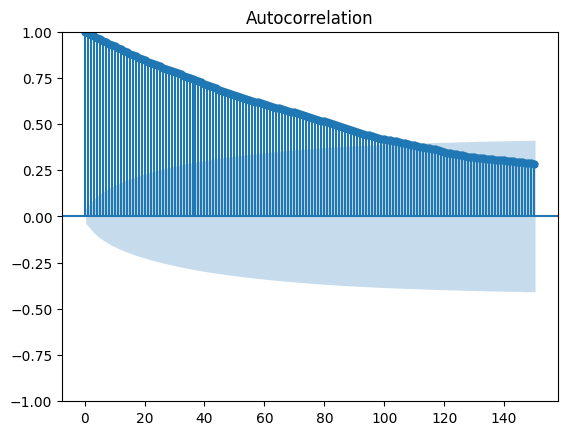

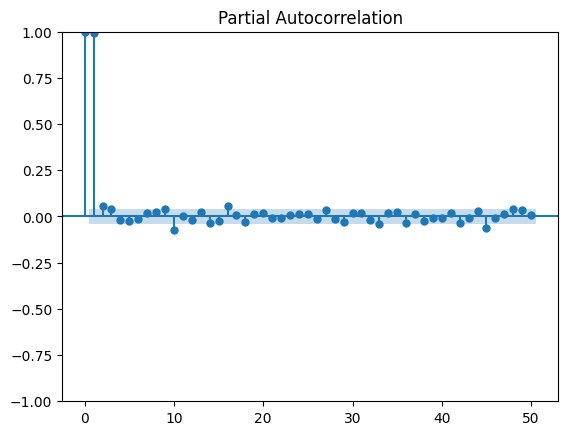

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dfeuraud_hr['bid_close'], lags = 150)
plot_pacf(dfeuraud_hr['bid_close'], lags = 50)

plt.show()

Our ARIMA model is defined by 3 parameters, ARIMA(p,d,q), where p is the number of significant lags in ACF, d is the differencing done, and q is the number of significant lags in PACF. Significant lags are lags outside the blue area in the graphs. So for eur/aud, p = 100, q = 2, d = 0, and this can be finetuned using AIC.

In [87]:
arima_model = ARIMA(dfeuraud_hr['bid_open'], order = (100,0,2))
model = arima_model.fit()

c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [88]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:               bid_open   No. Observations:                 2486
Model:               ARIMA(100, 0, 2)   Log Likelihood               12446.149
Date:                Tue, 18 Oct 2022   AIC                         -24684.299
Time:                        12:36:14   BIC                         -24079.182
Sample:                             0   HQIC                        -24464.550
                               - 2486                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6375      0.005    363.810      0.000       1.629       1.646
ar.L1          0.6015      0.555      1.084      0.278      -0.486       1.689
ar.L2          0.2556      0.726      0.352      0.7

The above model took around 35 minutes, and our autocorrelation function looks too perfect, with the 100 terms causing a heavy strain. We want to experiment a bit with lower terms, so we will try some differencing.

In [ ]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(dfeuraud_hr["bid_close"].diff())

ax2 = f.add_subplot(122)
plot_acf(dfeuraud_hr["bid_close"].diff().dropna(), ax = ax2)
plt.show()

This is a significant improvement, as our p parameter has gone from p = 100 to p = 1 just with one differencing. Let us see the PACF as well.

In [ ]:
f = plt.figure()
ax1 = f.add_subplot(121)
plot_acf(dfeuraud_hr["bid_close"].diff().dropna(), ax = ax1)

ax2 = f.add_subplot(122)
plot_pacf(dfeuraud_hr["bid_close"].diff().dropna(), ax = ax2)
plt.show()

We can see that our p-value becomes extremely small as we difference, and even though we could take the non-differenced data set, there are issues with the autocorrelation function. So we will consider our differencing parameter as d = 1.

In [ ]:
from pmdarima.arima import auto_arima

#train test split
train_size = 0.8
split_idx = round(len(dfeuraud_hr['bid_close']) * train_size)
split_idx

#splitting
train = dfeuraud_hr['bid_close'].iloc[:split_idx]
test = dfeuraud_hr['bid_close'].iloc[split_idx:]

fig,ax = plt.subplots(figsize = (12,8))
kws = dict(marker = 'o')
plt.plot(train, label = "Train", **kws)
plt.plot(test, label = "Test", **kws)
ax.legend(bbox_to_anchor=[1,1])

train_data = dfeuraud_hr['bid_close'][:int(len(dfeuraud_hr)*0.8)]
test_data = dfeuraud_hr['bid_close'][int(len(dfeuraud_hr)*0.8):]

In [ ]:
import pmdarima as pm

ARIMA_model = pm.auto_arima(train_data, m=12)
ARIMA_model.summary()

In [ ]:
model.plot_diagnostics(figsize = (12,8))

In [ ]:
model = ARIMA(train_data, order=(0, 1, 3))
model_fit = model.fit()
model_fit.summary()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(dfeuraud_hr["bid_close"])
plot_predict(model_fit, start=len(train_data), end=(len(dfeuraud_hr)-1), ax=axs)
plt.xlabel('Date')
plt.ylabel('Passengers')


In [ ]:
df = dfeuraud_hr['bid_close']
df.plot()

train_size = 0.8
split_idx = round(len(df) * train_size)
split_idx

#splitting
df_train = df.iloc[:split_idx]
df_test = df.iloc[split_idx:]

model = ARIMA(df_train, order = (0,1,1))
model_fit = model.fit()
print(model_fit.summary())



#arima_model = ARIMA(dfeuraud_hr['bid_close'], order = (0,1,1))
#model_fit = arima_model.fit()

#fig, axs = plt.subplots(1,1, figsize = (10,5))
#plt.plot(dfeuraud_hr['bid_close'])
#plot_predict(model_fit, start = len(train), end = len(dfeuraud_hr['bid_close']-1), ax = axs)
#plt.xlabel("Hours")
#plt.ylabel("Price")

In [ ]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuals", ax = ax[0])
residuals.plot(title = "Density", kind = 'kde', ax = ax[1])
plt.show()

#looks good, random and dnesity normally distributed

So we could technically choose p = 1, d = 1, q = 1. However to introduce some more parameter testing, we are going to conduct a grid search. First, we need to ensure that our model remains significant at our desired differencing.

Trying to forecast with EUR/GBP via ARIMA model one last time.

In [6]:
df = dfeurgbp_hr["bid_close"]
print(f"Total Samples:{len(df)}")
print(df.head())
type(df)


Total Samples:2486
0    0.90036
1    0.89862
2    0.89718
3    0.89785
4    0.89881
Name: bid_close, dtype: float64


pandas.core.series.Series

In [7]:
df = df.to_frame()
print(df)

      bid_close
0       0.90036
1       0.89862
2       0.89718
3       0.89785
4       0.89881
...         ...
2481    0.90063
2482    0.89946
2483    0.89990
2484    0.89861
2485    0.89904

[2486 rows x 1 columns]


In [8]:
print(f"Total Samples:{len(df)}")
print(df.head())

Total Samples:2486
   bid_close
0    0.90036
1    0.89862
2    0.89718
3    0.89785
4    0.89881


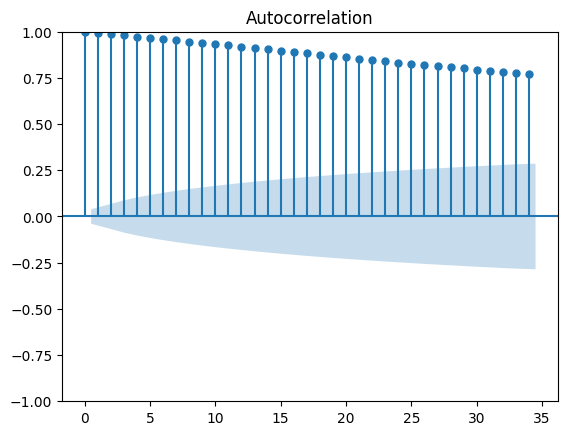

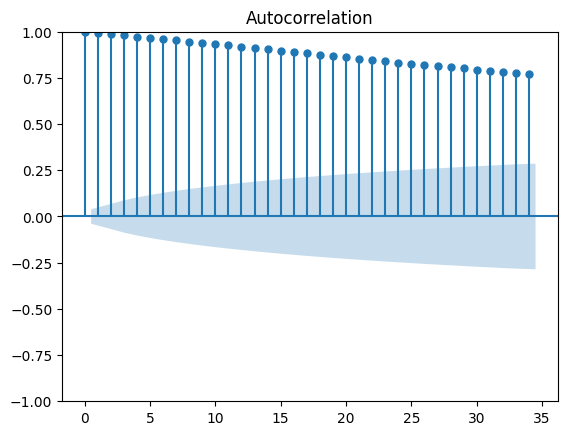

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.bid_close)

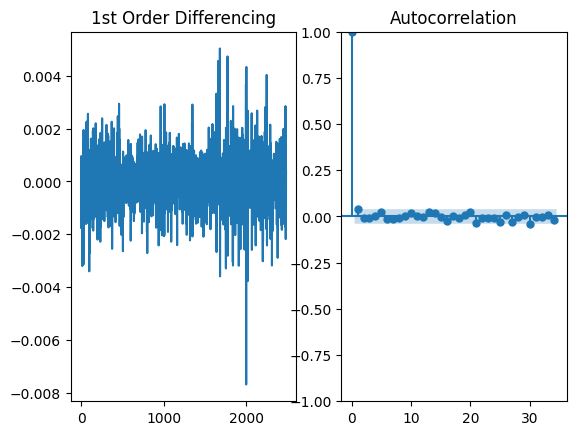

In [12]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(df.bid_close.diff())

ax2 = f.add_subplot(122)
plot_acf(df.bid_close.diff().dropna(), ax = ax2)
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller 

result = adfuller(df.bid_close.dropna())
print('p-value: ', result[1])

result = adfuller(df.bid_close.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.bid_close.diff().diff().dropna())
print('p-value: ', result[1])


p-value:  0.04316904869278075
p-value:  0.0
p-value:  1.7620369676602482e-28


c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


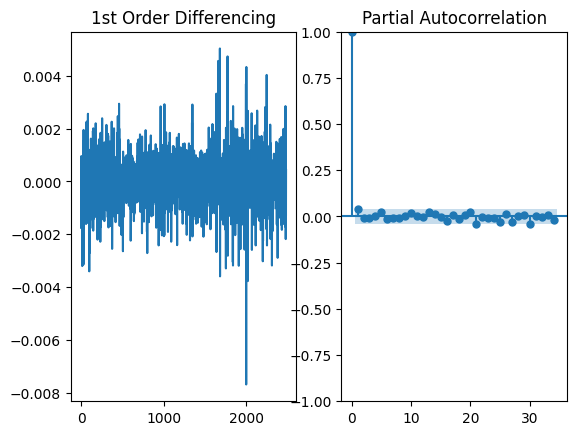

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(df.bid_close.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.bid_close.diff().dropna(), ax = ax2)
plt.show()

c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


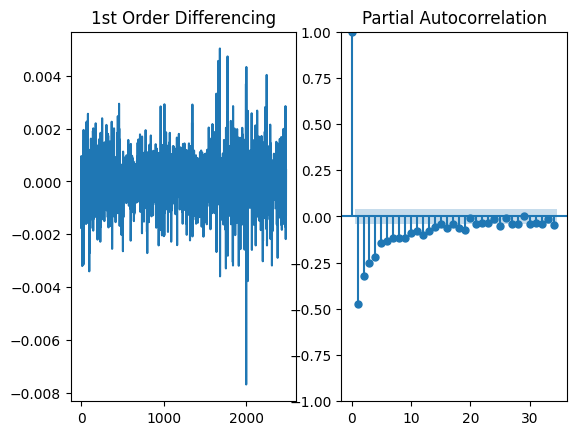

In [18]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(df.bid_close.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.bid_close.diff().diff().dropna(), ax = ax2)
plt.show()

In [23]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df.bid_close, order = (1,1,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:              bid_close   No. Observations:                 2486
Model:                 ARIMA(1, 1, 2)   Log Likelihood               14030.010
Date:                Thu, 03 Nov 2022   AIC                         -28052.020
Time:                        01:22:41   BIC                         -28028.748
Sample:                             0   HQIC                        -28043.568
                               - 2486                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6836      0.007     96.305      0.000       0.670       0.698
ma.L1         -0.6422      0.008    -85.207      0.000      -0.657      -0.627
ma.L2         -0.0341      0.015     -2.233      0.0

c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: >

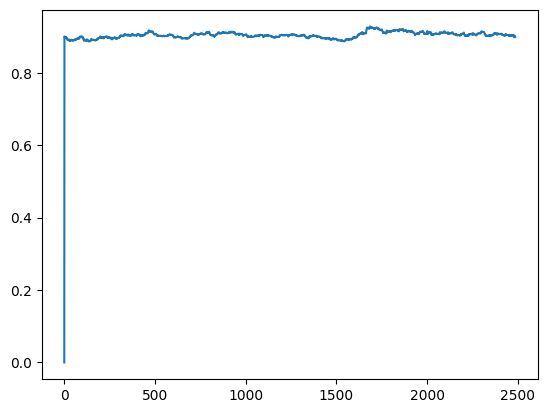

In [24]:
model.predict().plot()

In [25]:
model.predict()

0       0.000000
1       0.900360
2       0.898548
3       0.897133
4       0.897894
          ...   
2481    0.902874
2482    0.900528
2483    0.899422
2484    0.899930
2485    0.898560
Name: predicted_mean, Length: 2486, dtype: float64

Predicted Price pct change


c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


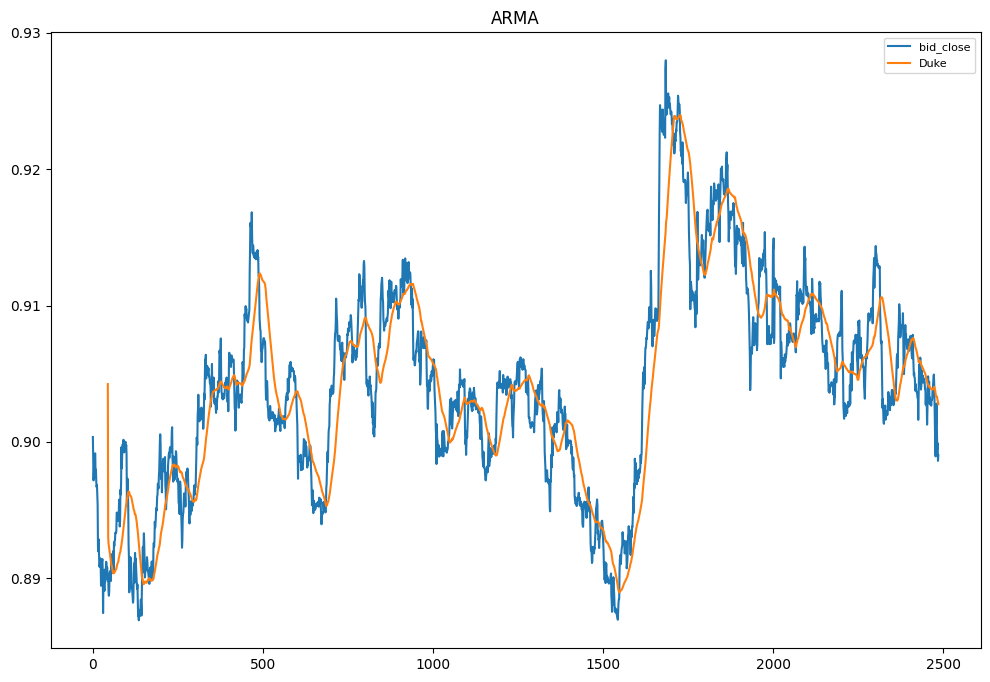

In [27]:
print("Predicted Price pct change")
def plotARMA(df_accumulative,ax,label):
    result=df_accumulative
    result=result.rolling(window=45).mean().dropna()
    mod = sm.tsa.arima.ARIMA(result, order=(2,0,0))
    res = mod.fit()
    # Plot the original series and the forecasted series
    #res.plot_predict(start=0, end=400)
    df_accumulative.plot(ax=ax,label=label)
    res.predict().plot(ax=ax,label=label)

fig,ax = plt.subplots(figsize=(12,8))    
plotARMA(df,ax,"Duke")
plt.legend(fontsize=8)
plt.title("ARMA")
plt.show()

In [28]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.bid_close[:85]
test = df.bid_close[85:]

In [36]:
msk = (df.index < len(df)-300)
df_train = df[msk].copy()
df_test = df[~msk].copy()


In [33]:
import pmdarima as pm

auto_arima = pm.auto_arima(df_train , stepwise = False, seasonal = False)
auto_arima

c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sari

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [34]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2456
Model:               SARIMAX(0, 1, 1)   Log Likelihood               13867.813
Date:                Thu, 03 Nov 2022   AIC                         -27729.625
Time:                        01:40:51   BIC                         -27712.208
Sample:                             0   HQIC                        -27723.296
                               - 2456                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.713e-06   1.79e-05      0.151      0.880   -3.24e-05    3.79e-05
ma.L1          0.0438      0.015      2.989      0.003       0.015       0.073
sigma2      7.248e-07   1.04e-08     69.716      0.000    7.04e-07    7.45e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3578.38
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: >

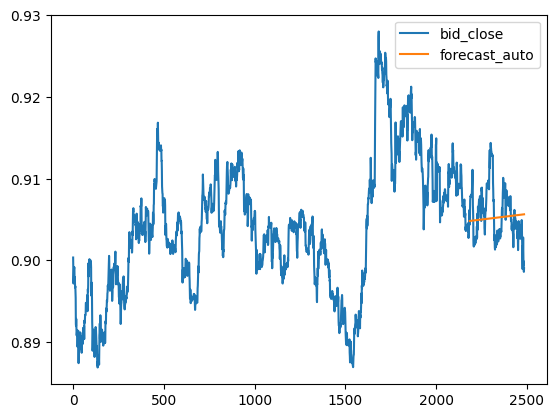

In [37]:
forecast_test_auto = auto_arima.predict(n_periods = len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

## Supervised learning model

Within this section models such as Logistic regression will be produced to determine if we get a good accuracy and r squared. Below is the model prediction formula which is used to complete the full process of model development.

In [231]:
def predictModel(data, ML):
    df_bid = data[['datetime', 'bid_open', 'bid_close', 'bid_volume']]
    df_bid = df_bid.set_index(['datetime'])
    #other features
    df_bid['avg_10'] = df_bid['bid_close'].rolling(window=10).mean()
    df_bid['avg_15'] = df_bid['bid_close'].rolling(window=15).mean()
    df_bid['Force_Index'] = df_bid['bid_close'] * df_bid['bid_volume']
    df_bid['RSI_15'] = ta.RSI(np.array(df_bid['bid_close']), timeperiod=10)
    df_bid['Open-Close'] = df_bid['bid_open'] - df_bid['bid_close'].shift(15)
    df_bid['Close_Diff'] = df_bid['bid_close'] - df_bid['bid_close'].shift(15)
    df_bid = df_bid.dropna()
    X= df_bid
    y = np.where(df_bid['bid_close'].shift(-5) > df_bid['bid_close'], 1,-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    if ML == 'lg':
        model = LogisticRegression().fit(X_train, y_train)
    elif ML == 'rf':
            model = RandomForestClassifier(n_estimators=1000)
            model.fit(X_train, y_train)
    else:
        print("Error: please type 'logistic or randomforest for the model parameter")
    return model, X_train, X_test, y_train, y_test

    
    

### Logistic Regression

Within this section we will call our predictModel function to determine how well performing our coefficents are within this model and find our prediction values for the evaluation section.

In [243]:
# display both logistic and random forest models for FX pairings
eurgbp_lmodel, eurgbpX_ltrain, eurgbpX_ltest, eurgbpy_ltrain, eurgbpy_ltest = predictModel(dfeurgbp_hr, 'lg')
euraud_lmodel, euraudX_ltrain, euraudX_ltest, euraudy_ltrain, euraudy_ltest = predictModel(dfeuraud_hr, 'lg')
eurusd_lmodel, eurusdX_ltrain, eurusdX_ltest, eurusdy_ltrain, eurusdy_ltest = predictModel(dfeurusd_hr, 'lg')
gbpusd_lmodel, gbpusdX_ltrain, gbpusdX_ltest, gbpusdy_ltrain, gbpusdy_ltest = predictModel(dfgbpusd_hr, 'lg')

In [244]:
#coefficents
print(f'Coefficient for eurogbp : \n{eurgbp_lmodel.coef_}')
print()
print(f'Coefficent for euroaud : \n{euraud_lmodel.coef_}')

Coefficient for eurogbp : 
[[-0.93363372 -0.93380731 -0.01182735 -0.92800819 -0.92817431  0.93380731
   0.0010019   0.04411762  0.04394402]]

Coefficent for euroaud : 
[[-2.71084481e-01 -2.71397797e-01 -9.83283417e-01 -1.81121896e-01
  -2.18371828e-01  2.71397797e-01 -1.93250853e-04  1.89417400e-01
   1.89104084e-01]]


In [245]:
#probability values
eurgbpl_prob = eurgbp_lmodel.predict_proba(eurgbpX_ltest)
euraudl_prob = euraud_lmodel.predict_proba(euraudX_ltest)
eurusdl_prob = eurusd_lmodel.predict_proba(eurusdX_ltest)
gbpusdl_prob = gbpusd_lmodel.predict_proba(gbpusdX_ltest)
print(f'Probability values for eurgbp: \n{eurgbpl_prob[:5]}')


Probability values for eurgbp: 
[[0.50265561 0.49734439]
 [0.50263583 0.49736417]
 [0.50157867 0.49842133]
 [0.50098355 0.49901645]
 [0.50058616 0.49941384]]


In [246]:
#prediction values
eurgbpl_predictvals = eurgbp_lmodel.predict(eurgbpX_ltest)
euraudl_predictvals = euraud_lmodel.predict(euraudX_ltest)
eurusdl_predictvals = eurusd_lmodel.predict(eurusdX_ltest)
gbpusdl_predictvals = gbpusd_lmodel.predict(gbpusdX_ltest)
print(f'Prediction values for eurgbp: \n {eurgbpl_predictvals[:20]}')

Prediction values for eurgbp: 
 [-1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


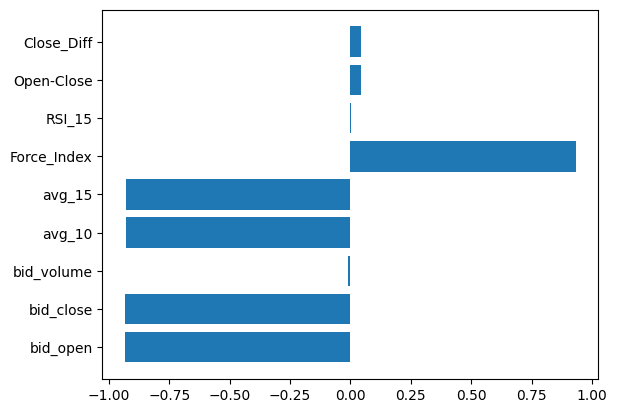

In [247]:
data = {'feature_names':np.array(eurgbpX_ltrain.columns),'feature_importance':np.array(eurgbp_lmodel.coef_[0])}
fi = pd.DataFrame(data)
plt.barh(fi['feature_names'], fi['feature_importance'])
plt.show()

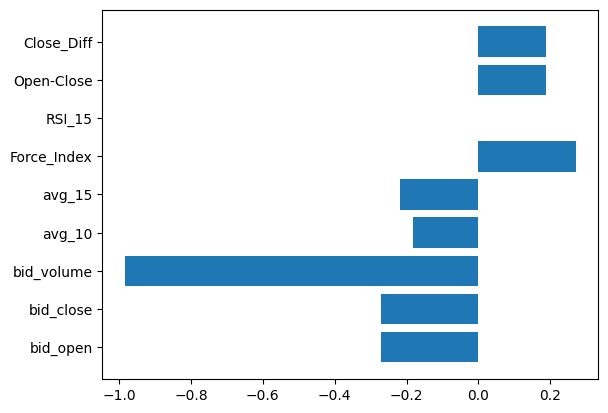

In [248]:
data = {'feature_names':np.array(euraudX_ltrain.columns),'feature_importance':np.array(euraud_lmodel.coef_[0])}
fi = pd.DataFrame(data)
plt.barh(fi['feature_names'], fi['feature_importance'])
plt.show()

### Random Forest

Similarly to the Logistic regression we also perform the same tasks.

In [251]:
eurgbp_rmodel, eurgbpX_rtrain, eurgbpX_rtest, eurgbpy_rtrain, eurgbpy_rtest = predictModel(dfeurgbp_hr, 'rf')
euraud_rmodel, euraudX_rtrain, euraudX_rtest, euraudy_rtrain, euraudy_rtest = predictModel(dfeuraud_hr, 'rf')

In [252]:
eurusd_rmodel, eurusdX_rtrain, eurusdX_rtest, eurusdy_rtrain, eurusdy_rtest = predictModel(dfeurusd_hr, 'rf')
gbpusd_rmodel, gbpusdX_rtrain, gbpusdX_rtest, gbpusdy_rtrain, gbpusdy_rtest = predictModel(dfgbpusd_hr, 'rf')

In [235]:
#coefficent
print(f'Coefficient for eurogbp : \n{eurgbp_lmodel.coef_}')
print()
print(f'Coefficent for euroaud : \n{euraud_lmodel.coef_}')

Coefficient for eurogbp : 
[[-0.93363372 -0.93380731 -0.01182735 -0.92800819 -0.92817431  0.93380731
   0.0010019   0.04411762  0.04394402]]

Coefficent for euroaud : 
[[-2.71084481e-01 -2.71397797e-01 -9.83283417e-01 -1.81121896e-01
  -2.18371828e-01  2.71397797e-01 -1.93250853e-04  1.89417400e-01
   1.89104084e-01]]


In [279]:
#Probaility results
eurgbpr_prob = eurgbp_rmodel.predict_proba(eurgbpX_rtest)
euraudr_prob = euraud_rmodel.predict_proba(euraudX_rtest)
eurusdr_prob = eurusd_rmodel.predict_proba(eurusdX_rtest)
gbpusdr_prob = gbpusd_rmodel.predict_proba(gbpusdX_rtest)

In [280]:
#prediction values
eurgbpr_predictvals = eurgbp_rmodel.predict(eurgbpX_rtest)
euraudr_predictvals = euraud_rmodel.predict(euraudX_rtest)
eurusdr_predictvals = eurusd_rmodel.predict(eurusdX_rtest)
gbpusdr_predictvals = gbpusd_rmodel.predict(gbpusdX_rtest)
print(f'Probability values for eurgbp: \n {eurgbpr_predictvals[:20]}')

Probability values for eurgbp: 
 [ 1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1  1]


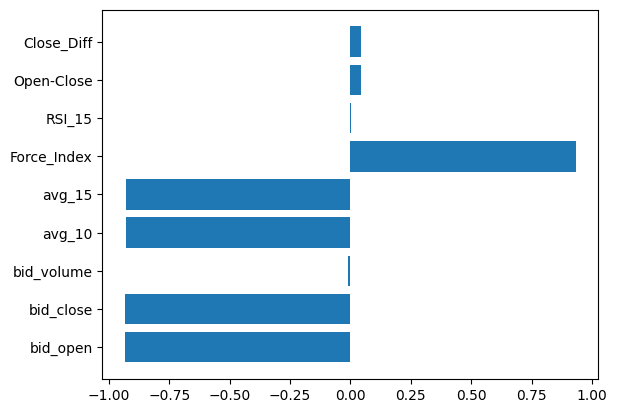

In [255]:
data = {'feature_names':np.array(eurgbpX_ltrain.columns),'feature_importance':np.array(eurgbp_lmodel.coef_[0])}
fi = pd.DataFrame(data)
plt.barh(fi['feature_names'], fi['feature_importance'])
plt.show()

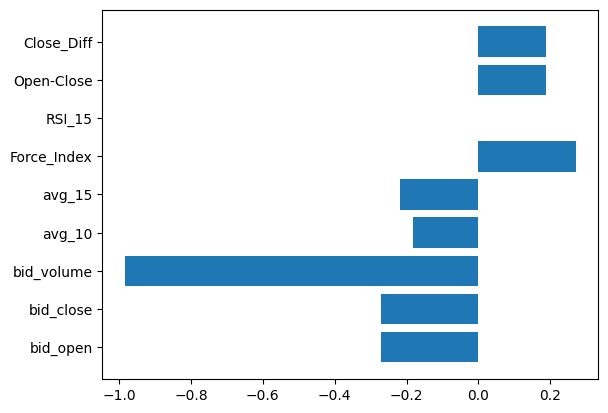

In [256]:
data = {'feature_names':np.array(euraudX_ltrain.columns),'feature_importance':np.array(euraud_lmodel.coef_[0])}
fi = pd.DataFrame(data)
plt.barh(fi['feature_names'], fi['feature_importance'])
plt.show()

## Model Evaluation

### Logistic model evaluation

The evaluation process will consist of checking the performance of the model's classification, accuracy and trend.

In [281]:
print(metrics.confusion_matrix(eurgbpy_ltest, eurgbpl_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(eurgbpy_ltest, eurgbpl_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[ 73 176]
 [ 51 195]]
tn:73, fp:176, fn:51, tp:195


In [220]:
print(metrics.confusion_matrix(euraudy_ltest, euraudl_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(euraudy_ltest, euraudl_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[249   0]
 [246   0]]
tn:249, fp:0, fn:246, tp:0


In [259]:
print(metrics.confusion_matrix(eurusdy_ltest, eurusdl_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(eurusdy_ltest, eurusdl_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[  0 263]
 [  0 232]]
tn:0, fp:263, fn:0, tp:232


In [260]:
print(metrics.confusion_matrix(gbpusdy_ltest, gbpusdl_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(gbpusdy_ltest, gbpusdl_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[ 49 199]
 [ 47 200]]
tn:49, fp:199, fn:47, tp:200


In [264]:
def LG_eval_scores(model, predict, X_train, y_train, X_test, y_test):
    print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 1))
    print(f'Test Score : {model.score(X_test, y_test) * 100:.2f}% using Logistic Regression.')
    print(f'Precision : {round(precision_score(y_test, predict),2)}')
    print(f'Accuracy: {round(accuracy_score(y_test, predict),2)}')

In [265]:
###Comparing both model score results
print('Logistic evaulation metrics')
print('EURGBP:')
LG_eval_scores(eurgbp_lmodel,  eurgbpl_predictvals, eurgbpX_ltrain, eurgbpy_ltrain, eurgbpX_ltest, eurgbpy_ltest)
print('EURAUD:')
LG_eval_scores(euraud_lmodel, euraudl_predictvals, euraudX_ltrain, euraudy_ltrain, euraudX_ltest, euraudy_ltest)
print('EURUSD:')
LG_eval_scores(eurusd_lmodel, eurusdl_predictvals, eurusdX_ltrain, eurusdy_ltrain, eurusdX_ltest, eurusdy_ltest)
print('GBPUSD:')
LG_eval_scores(gbpusd_lmodel, gbpusdl_predictvals, gbpusdX_ltrain, gbpusdy_ltrain, gbpusdX_ltest, gbpusdy_ltest)

Logistic evaulation metrics
EURGBP:
(R^2) Score: -0.8
Test Score : 54.14% using Logistic Regression.
Precision : 0.53
Accuracy: 0.54
EURAUD:
(R^2) Score: -1.0
Test Score : 50.30% using Logistic Regression.
Precision : 0.0
Accuracy: 0.5
EURUSD:
(R^2) Score: -1.1
Test Score : 46.87% using Logistic Regression.
Precision : 0.47
Accuracy: 0.47
GBPUSD:
(R^2) Score: -1.0
Test Score : 50.30% using Logistic Regression.
Precision : 0.5
Accuracy: 0.5


c:\Users\Chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


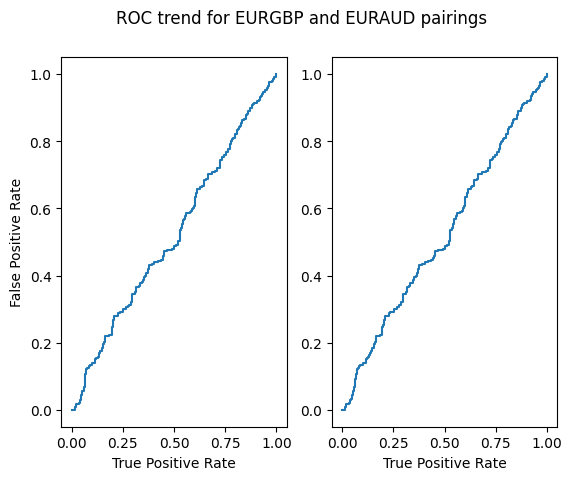

In [35]:
#checking the ROC (Reciever Operating Characteristic Curve) plot.
#This plot displays the sensitivity and specfiicity of the logistic model
eurgbpy_proba = eurgbp_lmodel.predict_proba(eurgbpX_ltest)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(eurgbpy_ltest,  eurgbpy_proba)
auc1 = round(metrics.roc_auc_score(eurgbpy_ltest,  eurgbpy_proba),3)

euraudy_proba = eurgbp_lmodel.predict_proba(euraudX_ltest)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(euraudy_ltest,  euraudy_proba)
auc2 = round(metrics.roc_auc_score(euraudy_ltest, euraudy_proba),3)

#create ROC curve
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('ROC trend for EURGBP and EURAUD pairings')
ax1.plot(fpr1,tpr1)# label="AUC="+str(auc1))
ax2.plot(fpr1,tpr1) #label="AUC="+str(auc2))
#ax1.legend(loc=4)
#ax2.legend(loc=4)

ax1.set(xlabel='True Positive Rate', ylabel='False Positive Rate')
ax2.set(xlabel='True Positive Rate')


plt.show()

Based on the consistent upward trend, this shows that the model method of classifying the data into categories is good.

In [266]:
def total_predictions(y_test, predict):
    combined = pd.concat({"Target": pd.Series(y_test),"Predictions": pd.Series(predict)}, axis=1)
    return combined

In [268]:
print('EURGBP:')
print(total_predictions(eurgbpy_ltest,eurgbpl_predictvals)["Predictions"].value_counts())
print('EURAUD:')
print(total_predictions(euraudy_ltest, euraudl_predictvals)["Predictions"].value_counts())
print('EURUSD:')
print(total_predictions(eurusdy_ltest, eurusdl_predictvals)["Predictions"].value_counts())
print('GBPUSD:')
print(total_predictions(gbpusdy_ltest, gbpusdl_predictvals)["Predictions"].value_counts())

EURGBP:
 1    371
-1    124
Name: Predictions, dtype: int64
EURAUD:
-1    495
Name: Predictions, dtype: int64
EURUSD:
1    495
Name: Predictions, dtype: int64
GBPUSD:
 1    399
-1     96
Name: Predictions, dtype: int64


### Random Forest evaluation

In [282]:
print(metrics.confusion_matrix(euraudy_rtest, euraudr_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(euraudy_rtest, euraudr_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[200  49]
 [175  71]]
tn:200, fp:49, fn:175, tp:71


In [283]:
print(metrics.confusion_matrix(eurgbpy_rtest, eurgbpr_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(eurgbpy_rtest, eurgbpr_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[122 127]
 [ 98 148]]
tn:122, fp:127, fn:98, tp:148


In [285]:
print(metrics.confusion_matrix(eurusdy_rtest, eurusdr_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(eurusdy_rtest, eurusdr_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[ 77 186]
 [ 73 159]]
tn:77, fp:186, fn:73, tp:159


In [286]:
print(metrics.confusion_matrix(gbpusdy_rtest, gbpusdr_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(gbpusdy_rtest, gbpusdr_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[ 78 170]
 [ 54 193]]
tn:78, fp:170, fn:54, tp:193


In [287]:
def RF_eval_scores(model, predict, X_train, y_train, X_test, y_test):
    print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
    print(f'Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Classifier.')
    print('Precision:', round(precision_score(y_test, predict),2))
    print('Accuracy:', round(accuracy_score(y_test, predict), 2)) 

In [288]:
print('Random Forest evaulation metrics')
print('EURGBP:')
RF_eval_scores(eurgbp_rmodel, eurgbpr_predictvals, eurgbpX_rtrain, eurgbpy_rtrain, eurgbpX_rtest, eurgbpy_rtest)
print('EURAUD:')
RF_eval_scores(euraud_rmodel, euraudr_predictvals, euraudX_rtrain, euraudy_rtrain, euraudX_rtest, euraudy_rtest)
print('EURUSD:')
RF_eval_scores(eurusd_rmodel, eurusdr_predictvals, eurusdX_rtrain, eurusdy_rtrain, eurusdX_rtest, eurusdy_rtest)
print('GBPUSD:')
RF_eval_scores(gbpusd_rmodel, gbpusdr_predictvals, gbpusdX_rtrain, gbpusdy_rtrain, gbpusdX_rtest, gbpusdy_rtest)

Random Forest evaulation metrics
EURGBP:
(R^2) Score: -0.8182
Test Score : 54.55% using Random Tree Classifier.
Precision: 0.54
Accuracy: 0.55
EURAUD:
(R^2) Score: -0.8102
Test Score : 54.75% using Random Tree Classifier.
Precision: 0.59
Accuracy: 0.55
EURUSD:
(R^2) Score: -1.1012
Test Score : 47.68% using Random Tree Classifier.
Precision: 0.46
Accuracy: 0.48
GBPUSD:
(R^2) Score: -0.8101
Test Score : 54.75% using Random Tree Classifier.
Precision: 0.53
Accuracy: 0.55


In [289]:
print('EURGBP:')
print(total_predictions(eurgbpy_rtest,eurgbpr_predictvals)["Predictions"].value_counts())
print('EURAUD:')
print(total_predictions(euraudy_rtest, euraudr_predictvals)["Predictions"].value_counts())
print('EURUSD:')
print(total_predictions(eurusdy_rtest, eurusdr_predictvals)["Predictions"].value_counts())
print('GBPUSD:')
print(total_predictions(gbpusdy_rtest, gbpusdr_predictvals)["Predictions"].value_counts())

EURGBP:
 1    275
-1    220
Name: Predictions, dtype: int64
EURAUD:
-1    375
 1    120
Name: Predictions, dtype: int64
EURUSD:
 1    345
-1    150
Name: Predictions, dtype: int64
GBPUSD:
 1    363
-1    132
Name: Predictions, dtype: int64


### Overall findings from our supervised learning models:
* Models are within the 50-55% accuracy and precision region which is fairly suitable prediction for short term investment
* Overall it seems that Random Forest Classifier produces the highest accuracy results and precision
* The Random Forest Classifier produces more consistant results when compared to logistic. As shown through the confusion matrix sometimes logistic does not away produce some results for positives or negative meaning classification is not always guaranteed
* Overall Seems like both models produce similar dominate trading signals. EURBGP have more positives (1), EURAUD have more negatives (-1), EURAUD has more positives (1) and GBPUSD has more positives (1)
* Based on our r-squared value it seems even if our results may dominate in positives it seems like the predicted results are following a strongly negative trend


## Trading strategy

In [ ]:
###produce bollinger bands here possibly

In [129]:
# def predictModel_test(data, ML):
#     df_bid = data[['datetime', 'bid_open', 'bid_close', 'bid_volume', 'bid_high', 'bid_low']]
#     df_bid = df_bid.set_index(['datetime'])
#     #other features
#     df_bid['target'] = df_bid.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["bid_close"]
#     weekly_mean = df_bid.rolling(3).mean()
#     quarterly_mean = df_bid.rolling(5).mean()
#     annual_mean = df_bid.rolling(7).mean()
#     weekly_trend = df_bid.shift(14).rolling(7).mean()["target"]
#     df_bid["weekly_mean"] = weekly_mean["bid_close"] / df_bid["bid_close"]
#     df_bid["quarterly_mean"] = quarterly_mean["bid_close"] / df_bid["bid_close"]
#     df_bid["annual_mean"] = annual_mean["bid_close"] / df_bid["bid_close"]

#     df_bid["annual_weekly_mean"] = df_bid["annual_mean"] / df_bid["weekly_mean"]
#     df_bid["annual_quarterly_mean"] = df_bid["annual_mean"] / df_bid["quarterly_mean"]
#     df_bid["weekly_trend"] = weekly_trend

#     df_bid["open_close_ratio"] = df_bid["bid_open"] / df_bid["bid_close"]
#     df_bid["high_close_ratio"] = df_bid["bid_high"] / df_bid["bid_close"]
#     df_bid["low_close_ratio"] = df_bid["bid_low"] / df_bid["bid_close"]
#     df_bid = df_bid.dropna()
#     X= df_bid.iloc[:, :-1]
#     y= df_bid.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["bid_close"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#     if ML == 'lg':
#         model = LogisticRegression().fit(X_train, y_train)
#     elif ML == 'rf':
#             model = RandomForestRegressor(n_estimators=100)
#             model.fit(X_train, y_train)
#     else:
#         print("Error: please type 'logistic or randomforest for the model parameter")
#     return model, X_train, X_test, y_train, y_test

In [102]:
from sklearn.metrics import precision_score
precision_score(yt2, pred)

1.0